# **Development of Machine learning Algorithms for Credit Fraud Detection using Naive Bayes and AdaBoosting**

## **Importing required libraries**

In [87]:
#importing the dataset and navigating to the directory
import os
os.chdir('C:/Users/kaikn/OneDrive/Desktop/ICT423 Group 4')

In [88]:
#import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#packages for ml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

## **Data exploration**

In [89]:
#load the dataset
df = pd.read_csv('creditcard.csv')

In [90]:
#displaying the first 5 data 
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [91]:
#displaying the last 5 data
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [92]:
#Display basic statistics
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [93]:
#count the amount of normal and fraudulent transactions
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


## **Visualize the datasets**

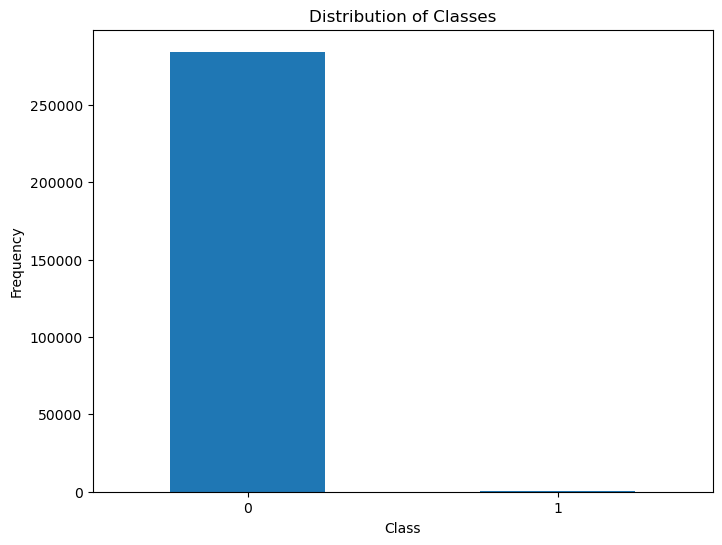

In [94]:
#plotting visual distributions of the 'Class', normal or fraudulent and other relevant features
plt.figure(figsize=(8, 6))
df['Class'].value_counts().plot(kind='bar') #creates a bar plot
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0) #rotate x-axis to avoid overlapping
plt.show()

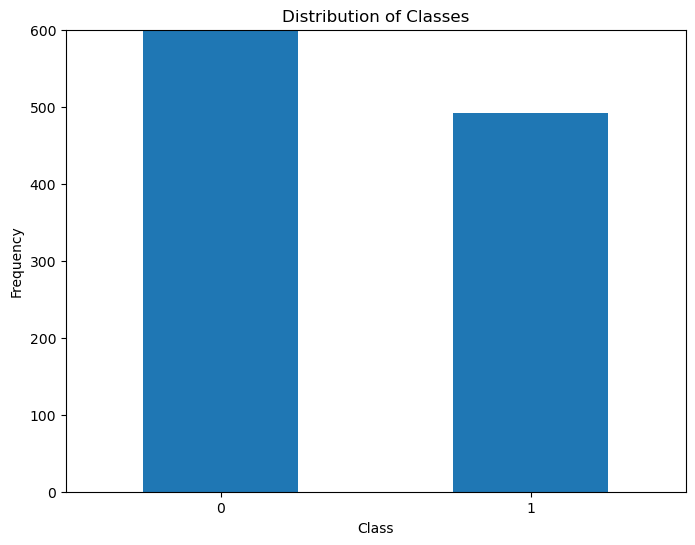

In [95]:
#Bar chart visualization laying emphasis on Class 1
plt.figure(figsize=(8, 6))
df['Class'].value_counts().plot(kind='bar') #creates a bar plot
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.ylim(0, 600)
plt.xticks(rotation=0) #rotate x-axis to avoid overlapping
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

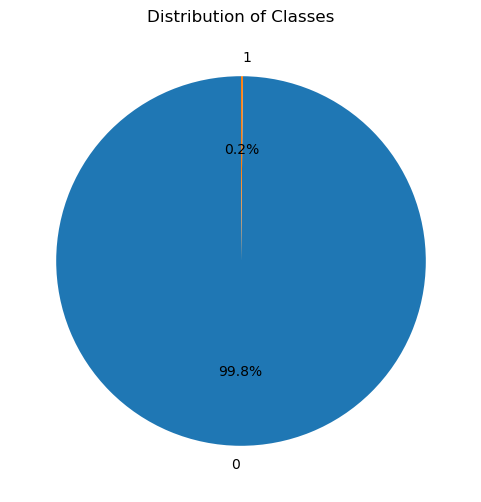

In [96]:
#plotting using a pie chart
plt.figure(figsize=(6, 6))
df['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes')
plt.ylabel('')
plt.show

## **Feature Exploration and investigation**

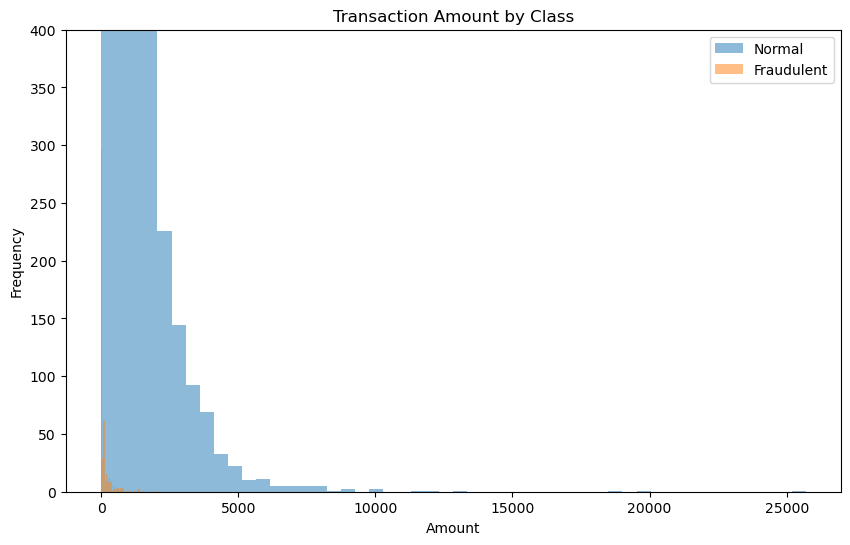

In [97]:
#Plotting a distribution of a specific feature e.g Amount
plt.figure(figsize=(10, 6))
plt.hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.5, label='Normal')
plt.hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.5, label='Fraudulent')
plt.legend(loc='upper right')
plt.title('Transaction Amount by Class')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.ylim(0, 400)
plt.show()

## **Data preprocessing**

In [98]:
#handle missing values by checking for them
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [99]:
#checking column names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [100]:
#checking each column datatypes
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [101]:
#handle outliers
from scipy.stats import zscore
#Calculate z-scores for numerical columns
#z-scores helps to identify outliers by flagging dat points that are different from the mean
z_scores = zscore(df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']])
abs_z_scores = np.abs(z_scores)
#remove rows with outliers
df = df[(abs_z_scores < 3).all(axis=1)]

In [102]:
#Normalize or Standardize Numerical Features
#separate features and traget variable
X = df.drop('Class', axis=1)
y =df['Class']
#Initialize StandardScaler
scaler = StandardScaler()
#Standardize numerical features
X_scaled = scaler.fit_transform(X)

In [103]:
#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Data Visualization**

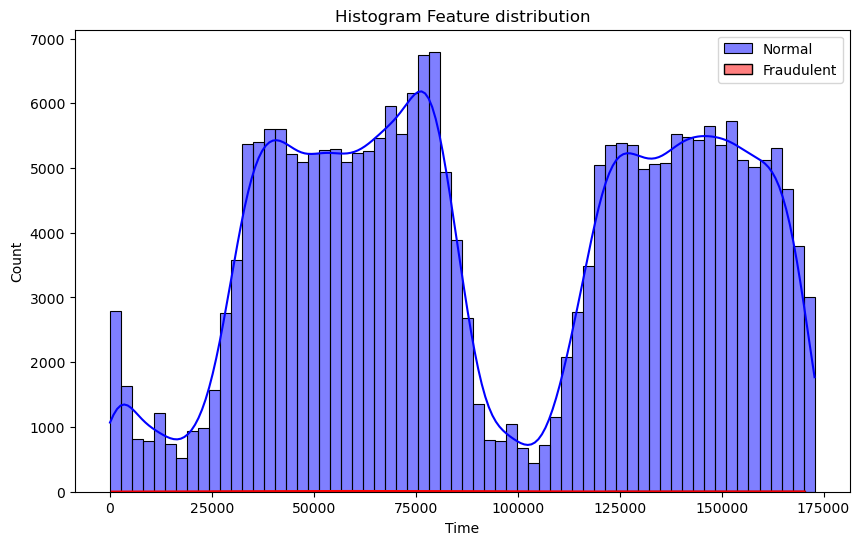

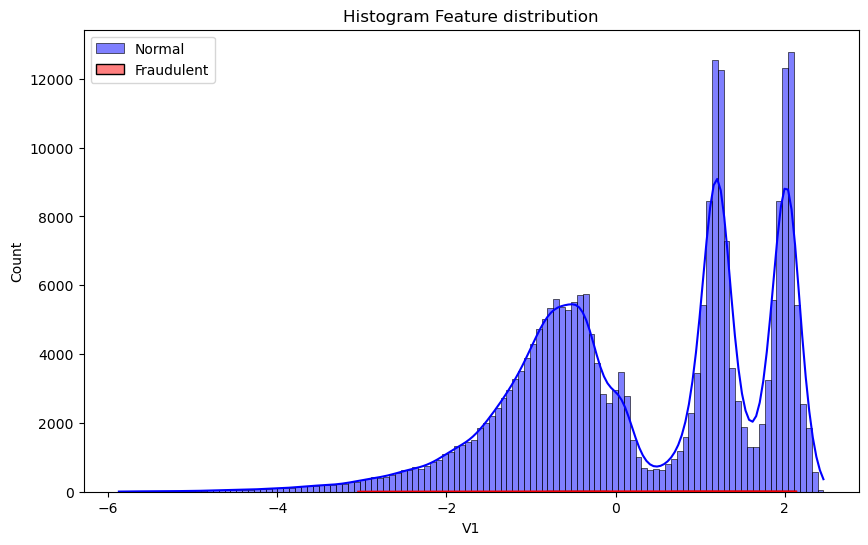

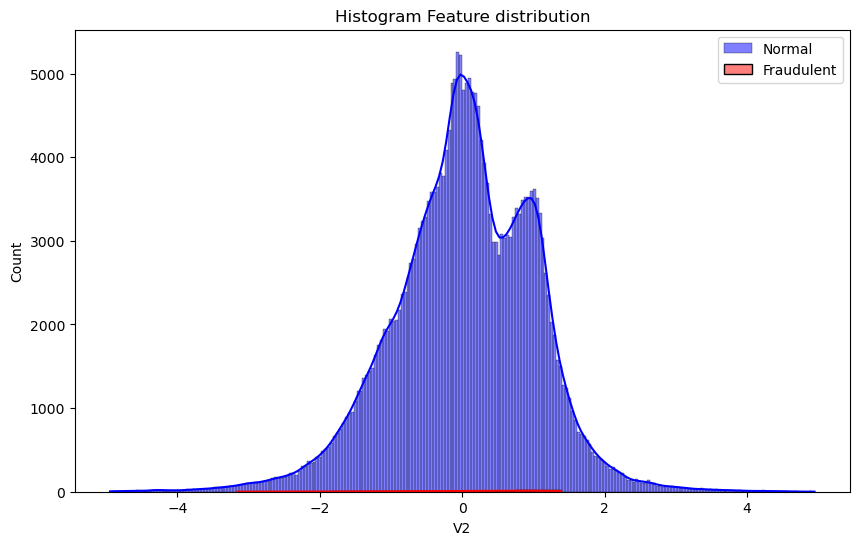

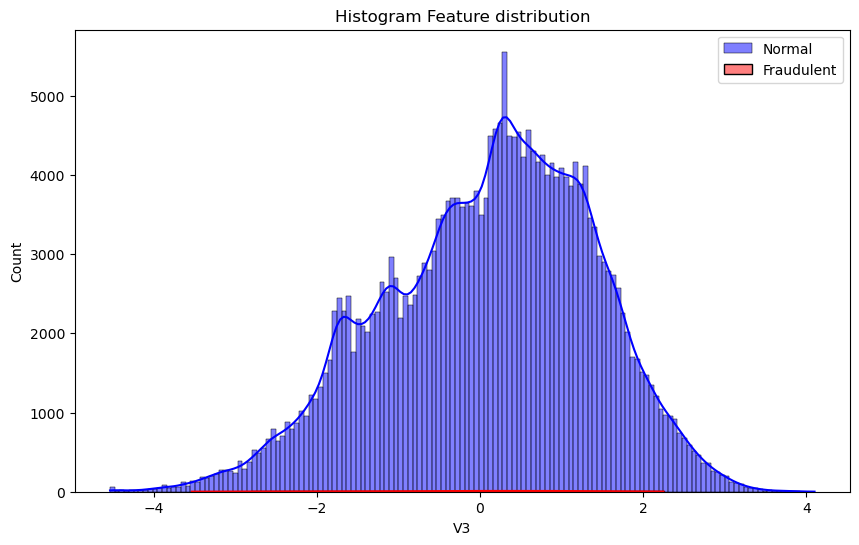

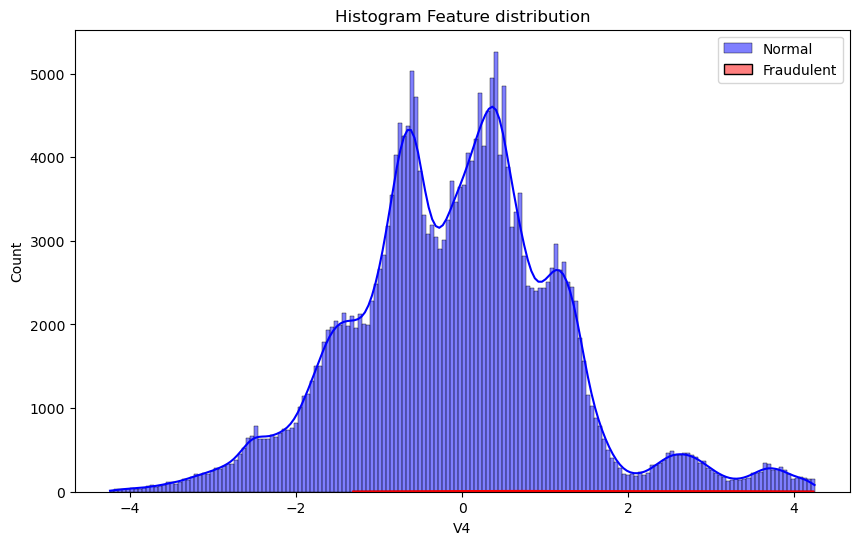

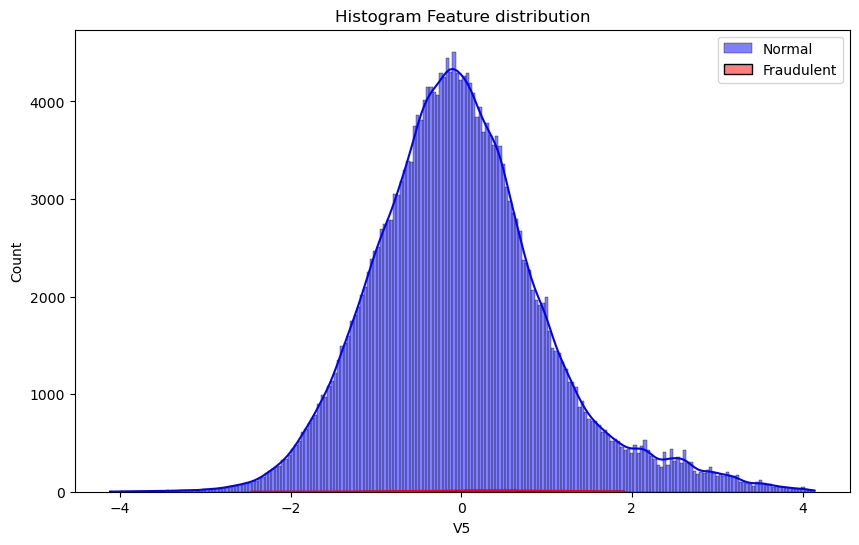

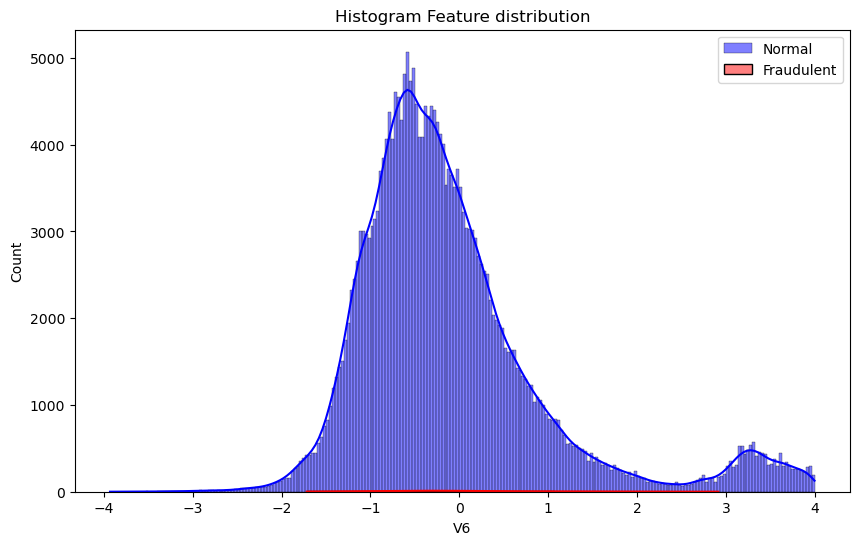

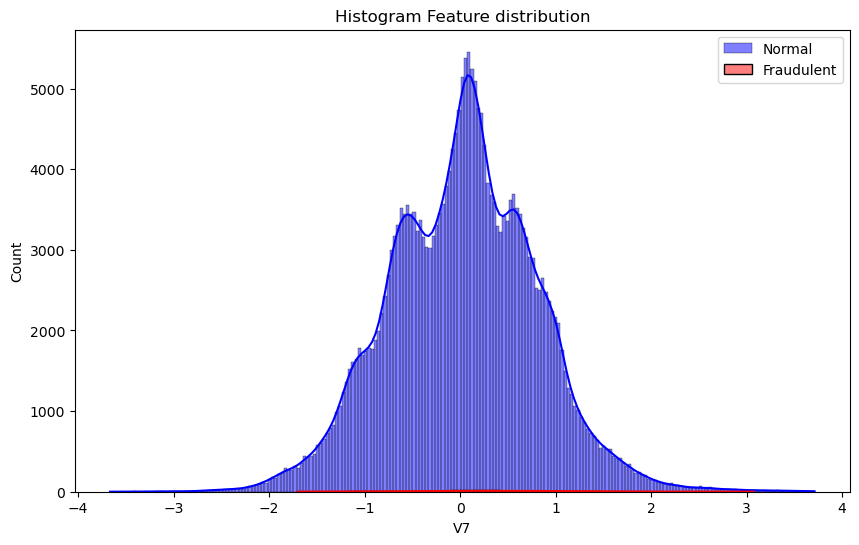

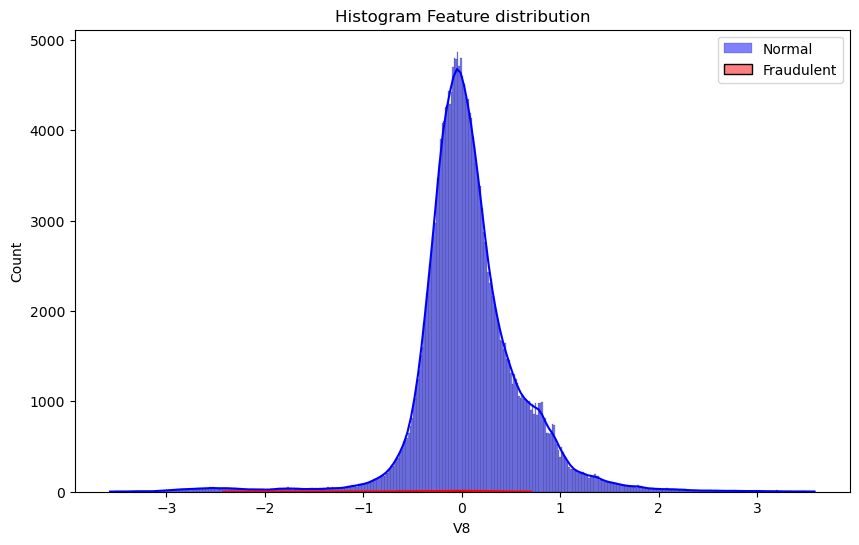

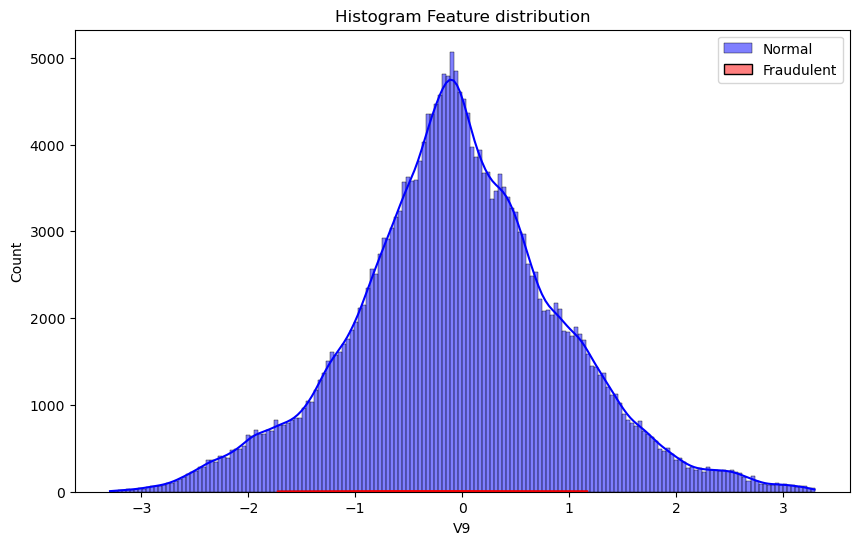

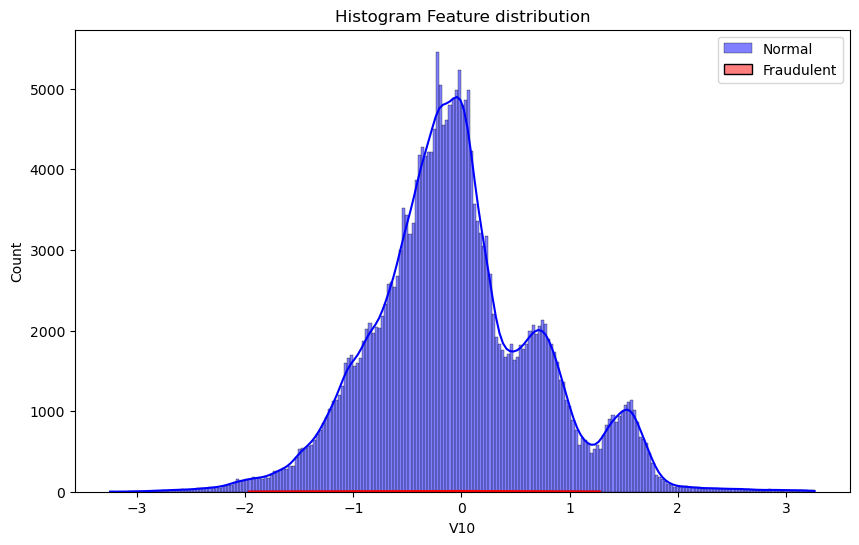

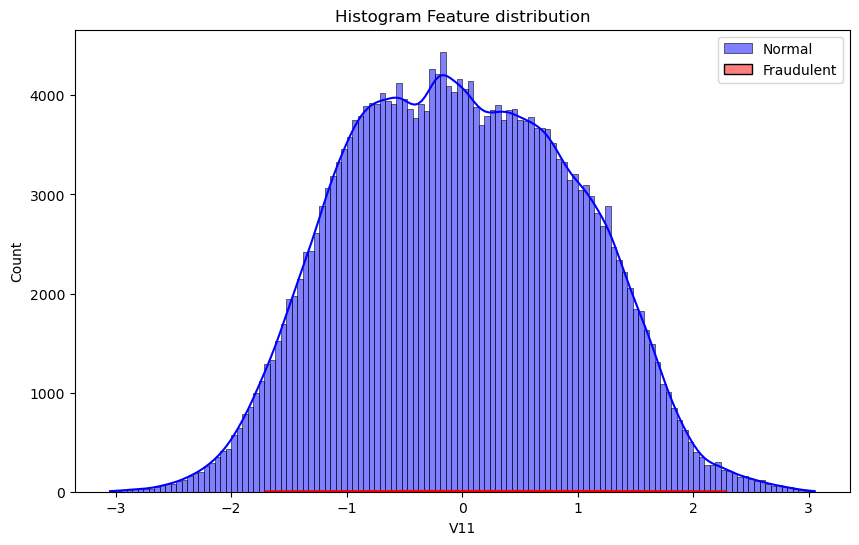

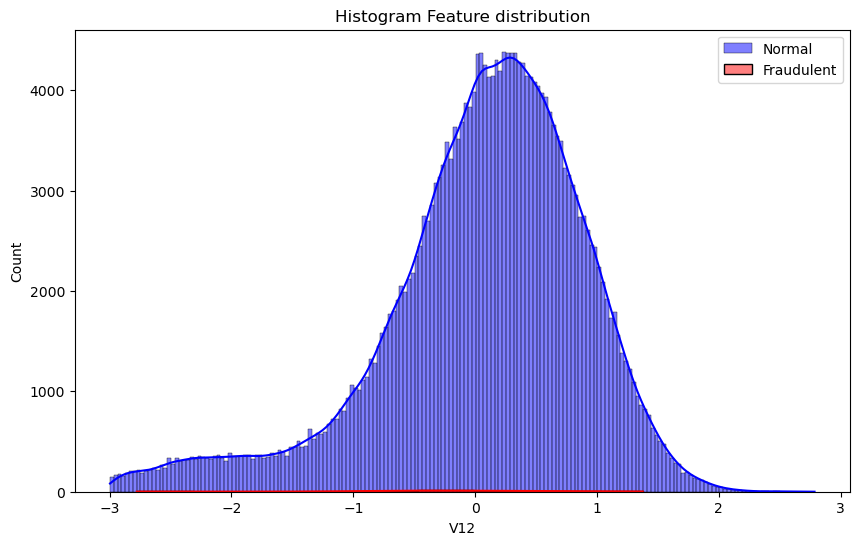

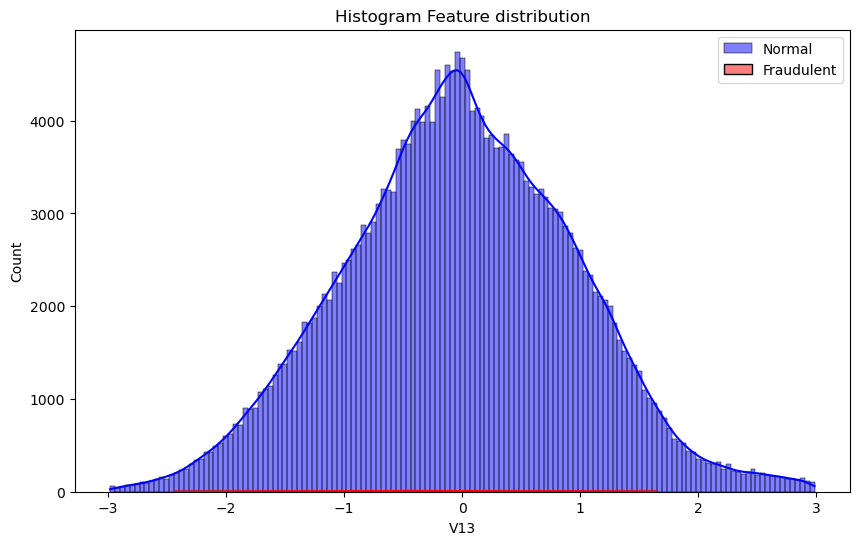

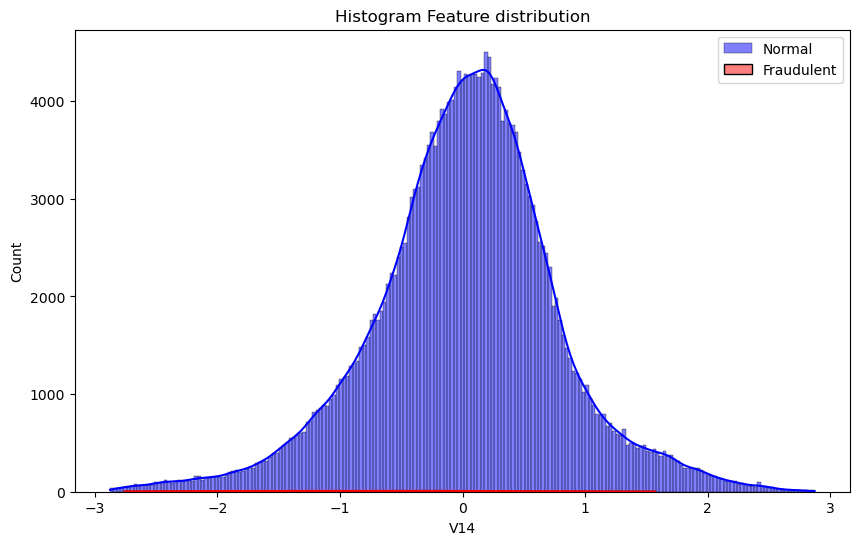

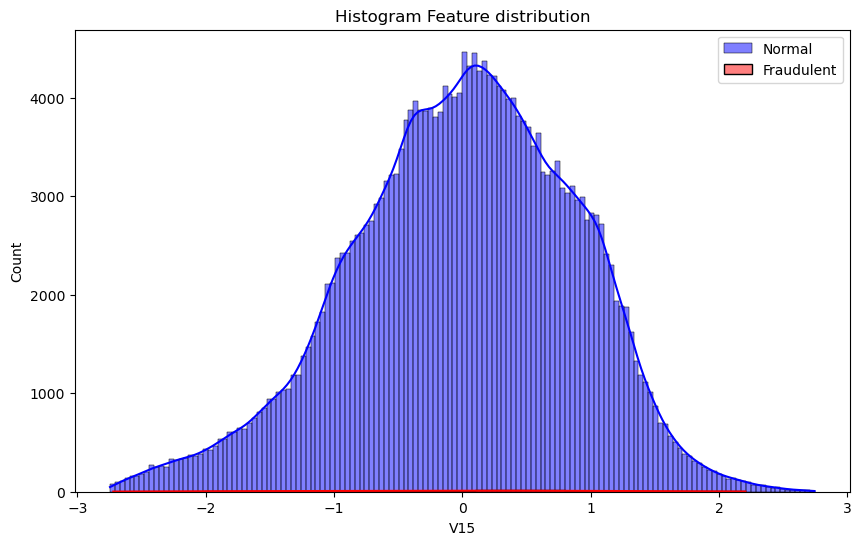

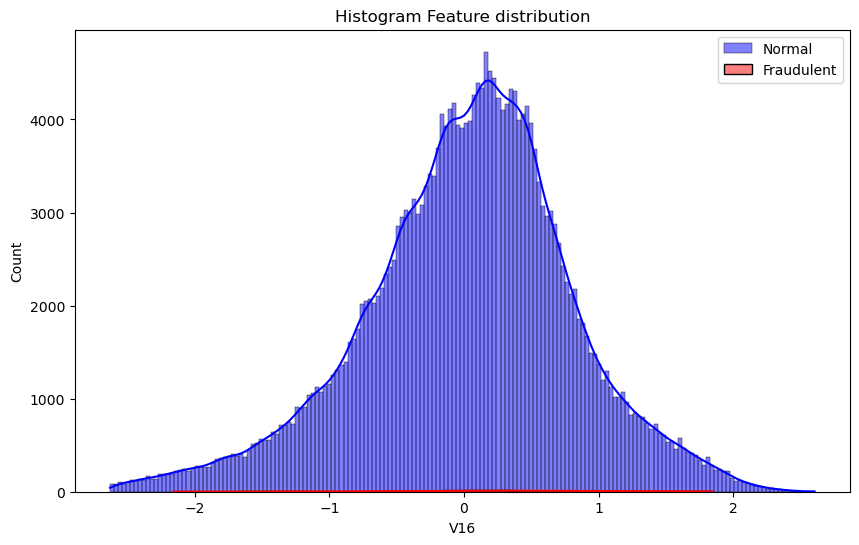

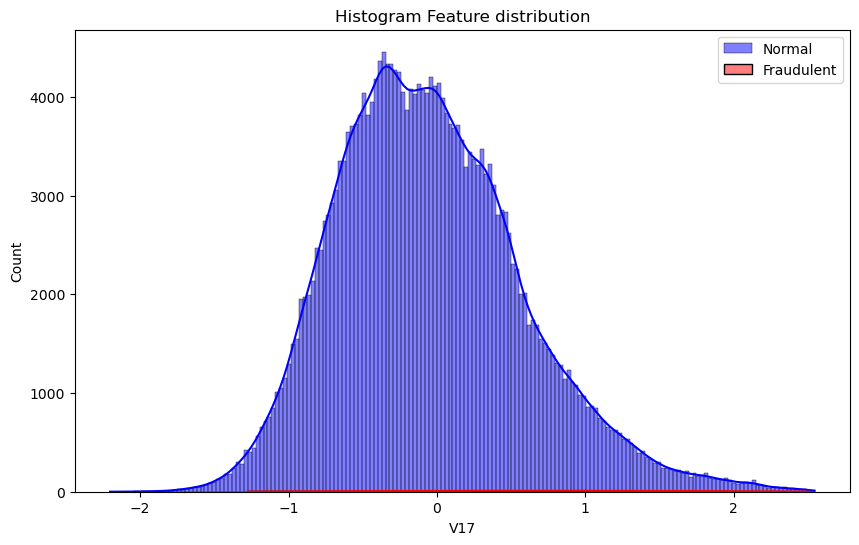

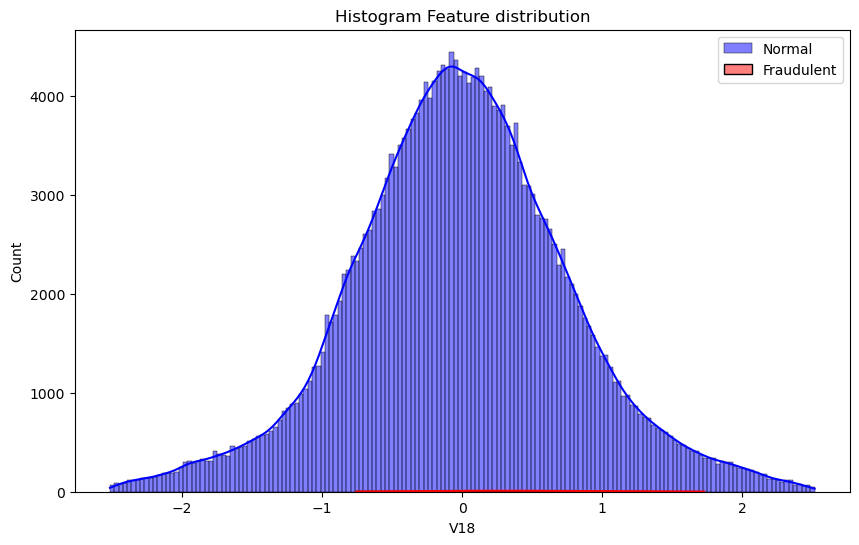

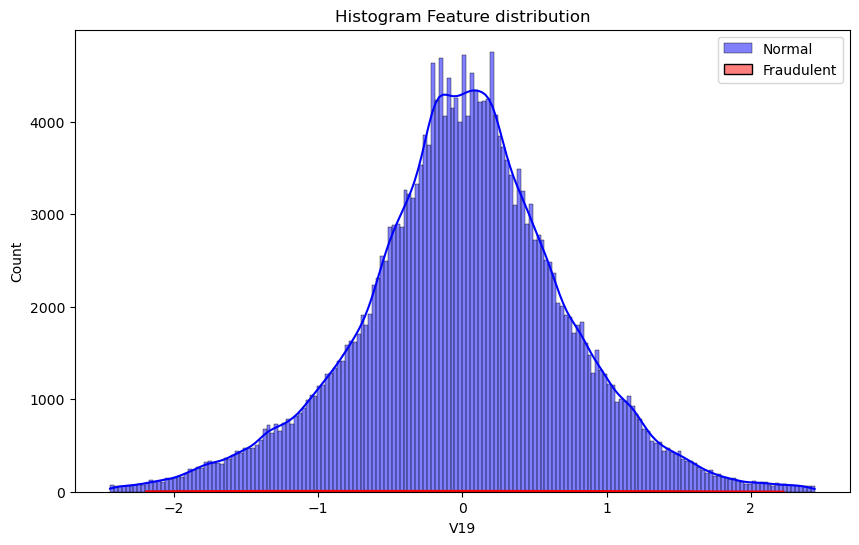

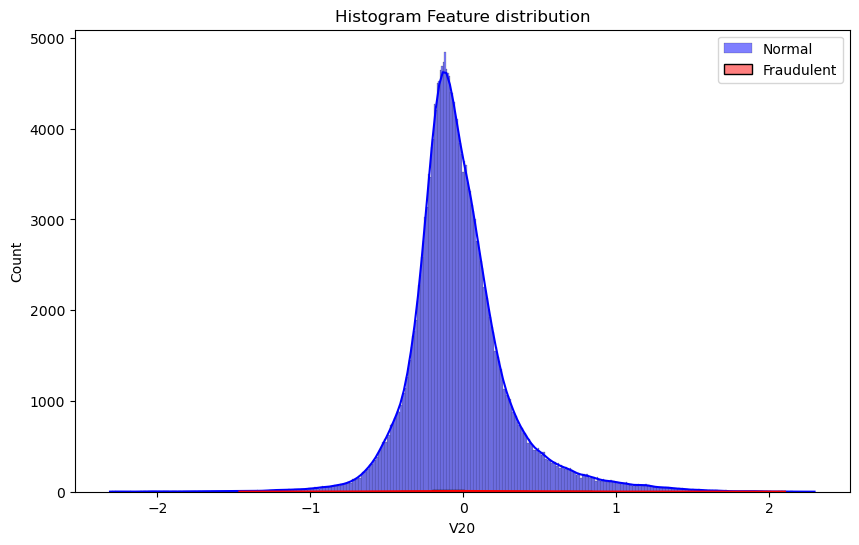

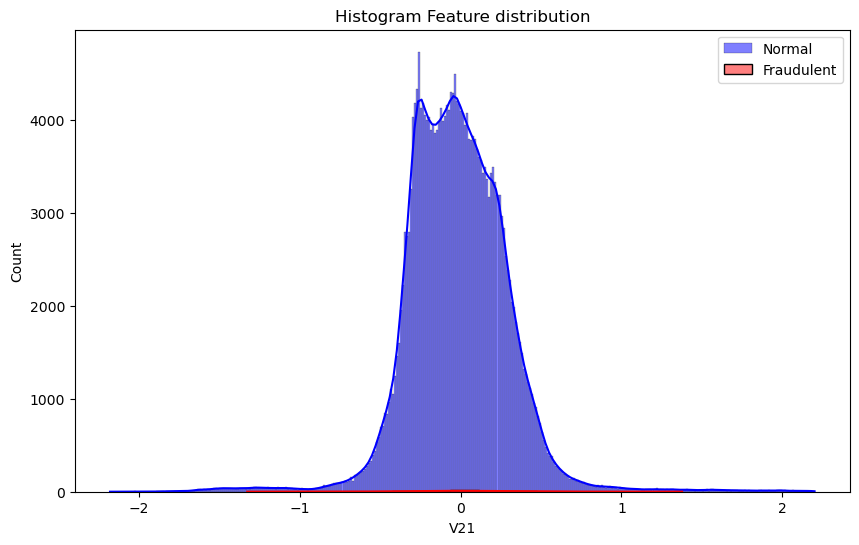

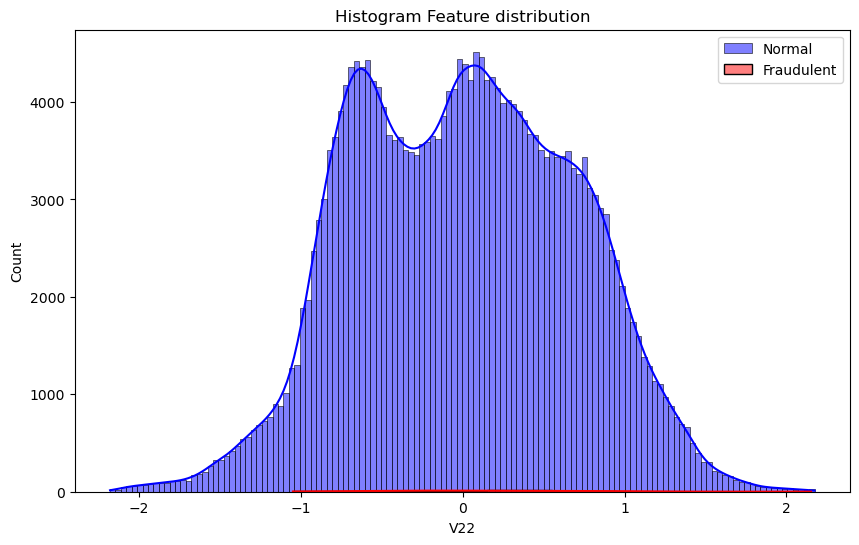

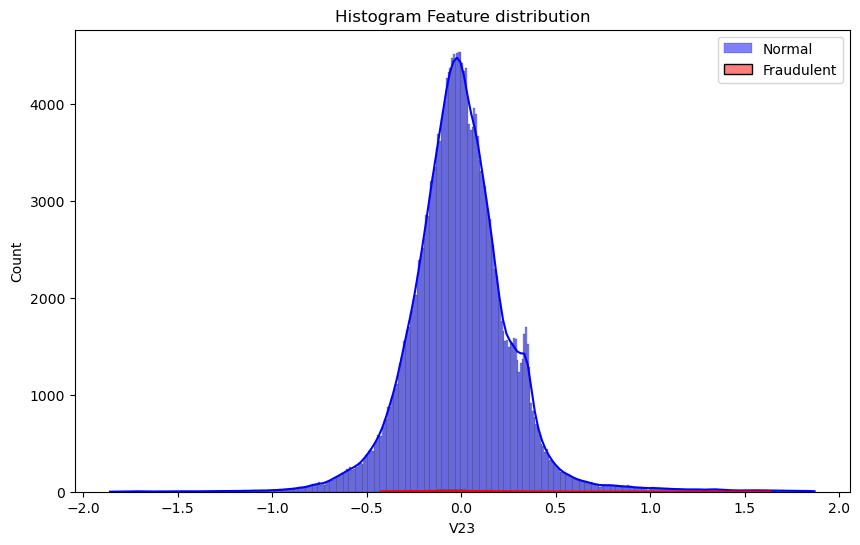

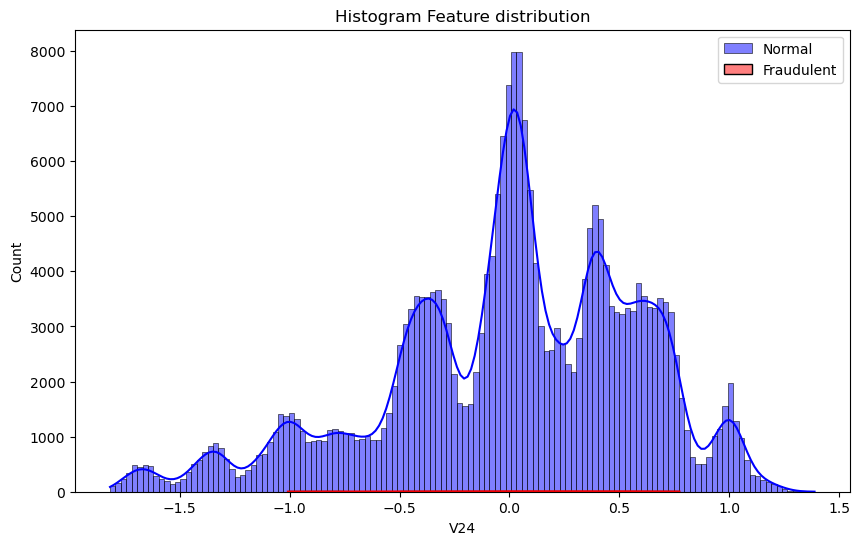

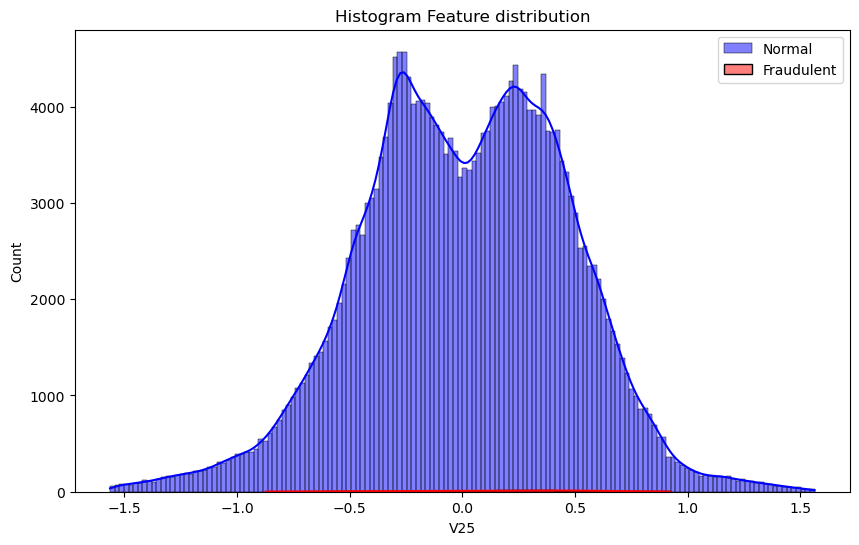

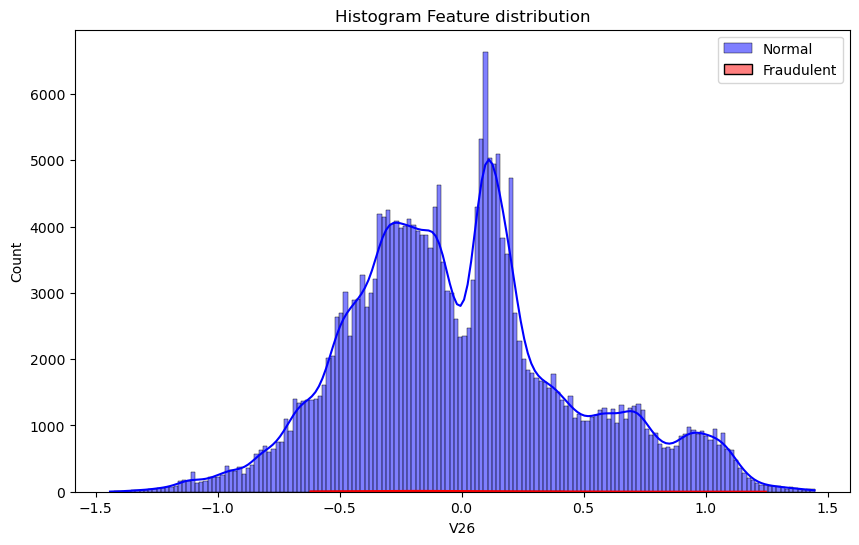

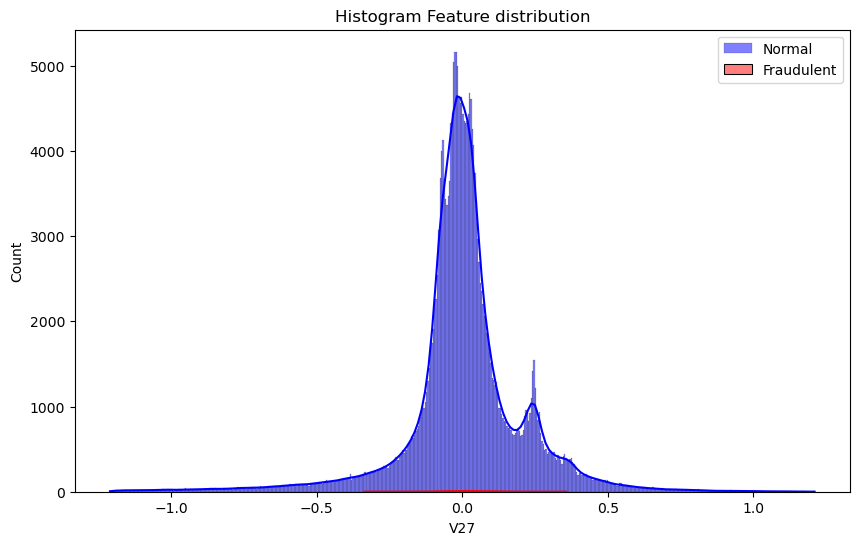

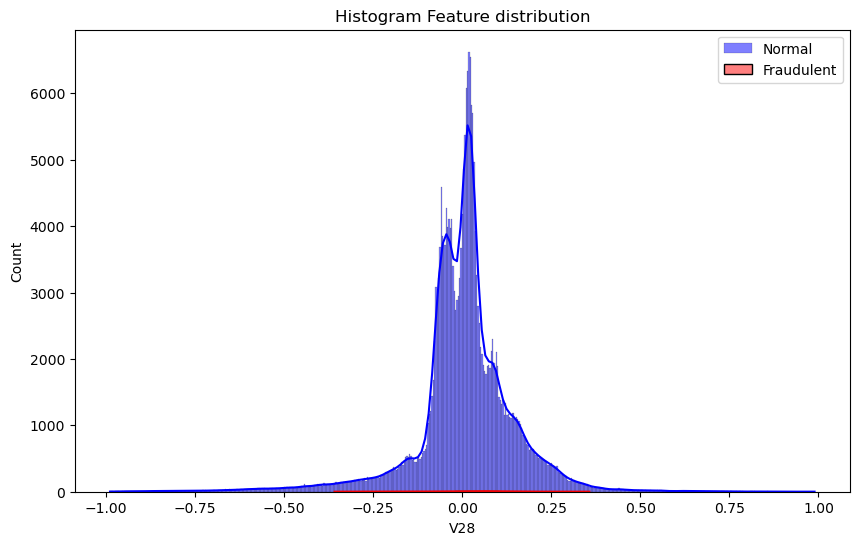

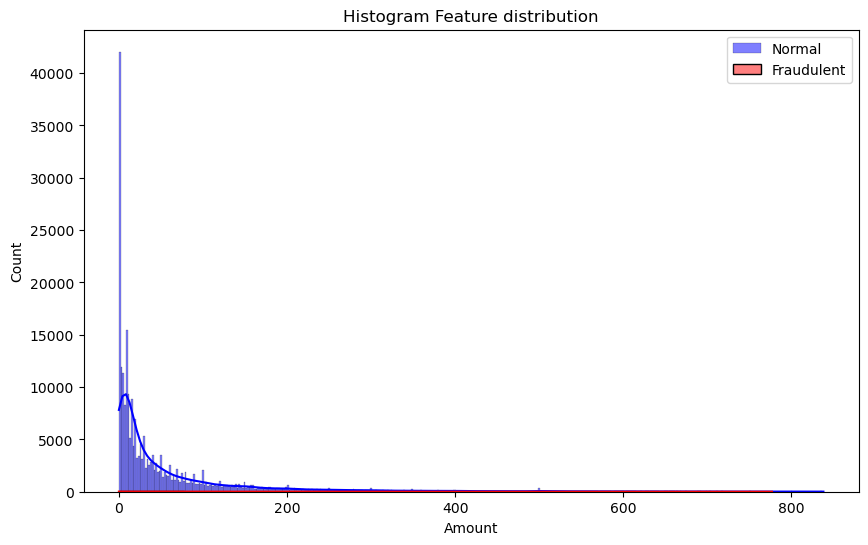

In [104]:
#plotting histograms for each feature
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['Class'] == 0][feature], color='blue', kde=True, label='Normal')
    sns.histplot(df[df['Class'] == 1][feature], color='red', kde=True, label='Fraudulent')
    plt.title('Histogram Feature distribution')
    plt.legend()
    plt.show()

## **Model selection**

In [105]:
#Naive bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train) #train the model

GaussianNB()

In [106]:
#making predictions and evaluating the model
y_pred_nb = naive_bayes_classifier.predict(X_test)
print(f'Accuracy Score (Naive Bayes): {accuracy_score(y_test, y_pred_nb)}')
print(f'Confusion Matrix (Naive Bayes):\n{confusion_matrix(y_test, y_pred_nb)}')
print(f'Classification Report (Naive Bayes):\n{classification_report(y_test, y_pred_nb)}')

Accuracy Score (Naive Bayes): 0.9881374116884957
Confusion Matrix (Naive Bayes):
[[48810   577]
 [    9     3]]
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     49387
           1       0.01      0.25      0.01        12

    accuracy                           0.99     49399
   macro avg       0.50      0.62      0.50     49399
weighted avg       1.00      0.99      0.99     49399



In [107]:
#Adaboost Classifier
ada_boost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost_classifier.fit(X_train, y_train) #train the model

AdaBoostClassifier(n_estimators=100, random_state=42)

In [108]:
#making predictions and evaluating the model
y_pred_ab = ada_boost_classifier.predict(X_test)
print(f'Accuracy Score (AdaBoost): {accuracy_score(y_test, y_pred_ab)}')
print(f'Confusion Matrix (AdaBoost):\n{confusion_matrix(y_test, y_pred_ab)}')
print(f'Classification Report (AdaBoost):\n{classification_report(y_test, y_pred_ab)}')

Accuracy Score (AdaBoost): 0.9997368367780725
Confusion Matrix (AdaBoost):
[[49386     1]
 [   12     0]]
Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49387
           1       0.00      0.00      0.00        12

    accuracy                           1.00     49399
   macro avg       0.50      0.50      0.50     49399
weighted avg       1.00      1.00      1.00     49399



## **Model training**

In [118]:
#Address Class Imbalance
#Oversamplin
minority_indices = np.where(y_train == 1)[0]
majority_indices = np.where(y_train == 0)[0]
oversampled_indices = np.random.choice(minority_indices, size=len(majority_indices), replace=True)
resampled_indices = np.concatenate([majority_indices, oversampled_indices])
# Obtain the resampled training data
X_train_resampled = X_train.iloc[resampled_indices]
y_train_resampled = y_train.iloc[resampled_indices]
naive_bayes_classifier.fit(X_train_resampled, y_train_resampled.values.ravel())

GaussianNB()

In [ ]:
#Undersampling
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
downsampled_data = pd.concat([majority_downsampled, minority_class])
X_downsampled = downsampled_data.drop('Class', axis=1)
y_downsampled = downsampled_data['Class']

In [ ]:
#Smote
minority_features = X_train[y_train == 1]
majority_features = X_train[y_train == 0]

## **Model evaluation**

In [ ]:
#importing required packages
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
#make predictions using cross validation and calculate the metrics
y_pred = cross_val_predict(naive_bayes_classifier, X_train, y_train, cv=5)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
auc_roc = roc_auc_score(y_train, y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1: {f1:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')

In [ ]:
#cost-sensitive learning with naive bayes using the sample weight method
weights = {0: 1, 1: 10}
sample_weights = [weights[y] for y in y_train]
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train, sample_weight=sample_weights)

## **Hyperparameter Tuning**

In [ ]:
#Experimenting with hyperparameters
alphas = [0.1, 0.5, 1.0, 1.5, 2.0]
for alpha in alphas:
    tuned_naive_bayes_classifier = GaussianNB(var_smoothing=alpha)
    tuned_naive_bayes_classifier.fit(X_train, y_train, sample_weight=sample_weights)

## **Predictions**

In [ ]:
#making prediction on another transaction data or testing data
y_pred = naive_bayes_predict(X_test)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')

# **Result interpretation**

## **Performance Analysis**
   **Review the key evaluation metrics(e.g accuracy, precison, recall etc) to guage the model's performance and also compare the performance of the naive bayes classifier on the test set or using cross validation. You can also do this for any other models you may have evaluated.**
## **Implications for Fraud detection**
   **Discuss the implications of false positive and false negative and consider costs. Highlight the potential financial and reputational costs associated with both types of errors in real world scenarios.**
## **Real world credit card security**
   **Consider the model deployment, adaptability of the model to evolve fraud patterns and collaboration between data scientists, financial institutions and cybersecurity experts to enhance security measures.**
## **Example Interpretation**
**Performance:** "The Naive Bayes classifier achieved an accuracy of 95%, with a precision of 92% and a recall of 89%. While the model demonstrates strong performance, further optimization and integration with advanced anomaly detection techniques could enhance its efficacy."

**Implications:** "False positives may inconvenience customers, leading to potential dissatisfaction, while false negatives pose significant financial risks to the institution. Balancing these trade-offs is essential to maintain customer trust and financial integrity."

**Credit Card Security**: "In real-world credit card security, deploying a robust fraud detection system involves a multi-layered approach, combining machine learning models with advanced cybersecurity measures. Continuous collaboration and adaptation to emerging threats are paramount to safeguarding customers and the financial ecosystem."
